# Introduction to the Book Recommendation System Project:

In the digital era, where the abundance of literature can be both a blessing and a challenge, the need for a sophisticated Book Recommendation System becomes increasingly evident. Navigating the vast world of books often results in information overload, leaving readers overwhelmed and potentially missing out on hidden gems that align with their preferences. In response to this challenge, I embark on a data-driven journey to design and implement an intelligent Book Recommendation System that caters to individual tastes and enriches the overall reading experience.


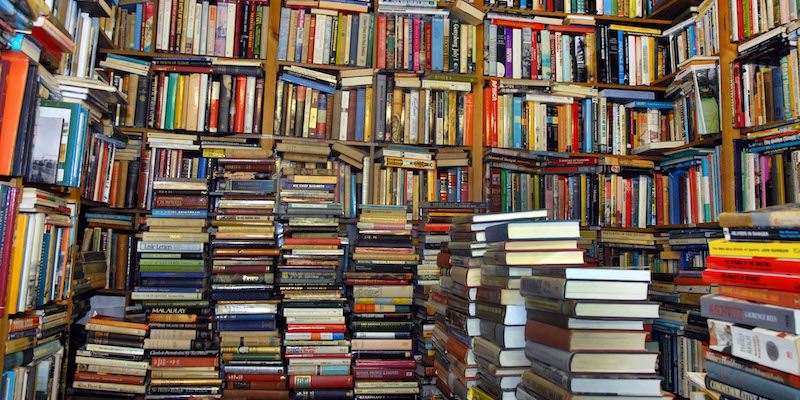

**Overview:**

The Book Recommendation System aims to revolutionize how users discover and engage with literature. Leveraging advanced data science and machine learning techniques, this platform will analyze user behavior, book metadata, and historical interactions to generate personalized book recommendations. This system seeks to not only streamline the book discovery process but also foster a sense of community and satisfaction among users.

**Problem Statement:**

The primary challenge addressed by this project is the overwhelming nature of extensive book catalogs, hindering users from efficiently finding books that resonate with their preferences. Traditional search methods may not capture the nuanced tastes of readers, leading to missed opportunities for engagement and sales. The absence of a personalized recommendation system can result in a suboptimal user experience and limit the potential for expanding the user base.

**Objectives:**

1. **Personalized Recommendations:**
   - Develop a recommendation system that tailors book suggestions based on user preferences, historical reading patterns, and implicit feedback.

2. **Enhanced User Engagement:**
   - Increase user engagement by providing relevant and diverse book recommendations, encouraging users to explore new genres and authors.

3. **Platform Differentiation:**
   - Differentiate our book platform by offering a unique and intelligent recommendation feature, setting our service apart from competitors.

4. **Data-Driven Insights:**
   - Utilize data-driven insights to understand user behavior,and emerging literary trends, informing strategic decisions.

**Success Metrics:**

Root Mean Squared Error of close to 0 to evaluate model efficiency.

**Methods:**

1. **Collaborative Filtering:**
   - Implement collaborative filtering techniques to identify patterns and preferences by analyzing user interactions and preferences.

2. **Content-Based Filtering:**
   - Leverage content-based filtering to recommend books based on the intrinsic features of the books themselves and align them with user preferences.

3. **Machine Learning Models:**
   - Develop machine learning models to predict user preferences and recommend books that are likely to resonate with individual users.

**Project Goals:**
* Develop a prediction model within the book recommendation system that can accurately recommend a particular book, based on preferences of similar users
* Establish evaluation metrics to assess the performance of the recommendation system.
* Create a function that will return top N recommendations for a user.
* Deploy and Implement a real-time recommendation feature that can adapt to users' changing preferences and provide up-to-date book suggestions.

**About The dataset:**

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/somnambwl/bookcrossing-dataset?resource=download)

The Book-Crossing dataset comprises 3 files:

* `Users`: Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
* `Books`: Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
* `Ratings`: Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.prediction_algorithms import KNNWithMeans
from surprise.model_selection import GridSearchCV



### **1.Data Understanding:**

In [2]:
# Loading the dataset.
book_ratings = pd.read_csv('data/Ratings.csv', encoding='latin-1', sep=';', on_bad_lines='skip')
books = pd.read_csv('data/BX-Books.csv', encoding='latin-1', sep=';', on_bad_lines='skip')
users = pd.read_csv('data/Users.csv', encoding='latin-1', sep=';', on_bad_lines='skip')

/tmp/ipykernel_28701/2334361373.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/BX-Books.csv', encoding='latin-1', sep=';', on_bad_lines='skip')
/tmp/ipykernel_28701/2334361373.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv('data/Users.csv', encoding='latin-1', sep=';', on_bad_lines='skip')


We can explore the three dataset by loading the first few rows to see what they contain

In [3]:
# The book_rating dataset
book_ratings.head()

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
# The books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# The users dataset
users.head()

,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


In [6]:
# A class to analyze the dataset
class DataAnalyzer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # a function to check the shape of the data
    def shape(self):
        return f'The Dataframe has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns\n'
    
    # A function to check the info of the dataset
    def info(self):
        return str(self.df.info()) + '\n'
    
    # A function to describe the numerical column
    def describe(self):
        return str(self.df.describe().T) + '\n'


In [7]:
# creating an instance of the class
data_analyzer = DataAnalyzer(book_ratings)

# Print the shape of the DataFrame
print(data_analyzer.shape())


The Dataframe has:
	* 1149780 rows
	* 3 columns



In [8]:
# Get and print information about the dataset
info_result = data_analyzer.info()
print(info_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None



In [9]:
# Get and print the description of numerical columns
describe_result = data_analyzer.describe()
print(describe_result)

             count           mean           std  min      25%       50%  \
User-ID  1149780.0  140386.395126  80562.277718  2.0  70345.0  141010.0   
Rating   1149780.0       2.866950      3.854184  0.0      0.0       0.0   

              75%       max  
User-ID  211028.0  278854.0  
Rating        7.0      10.0  



## Observations

From the above analysis I got the following results a

1. **Dataset Information:**
   - The dataset consists of 1,149,780 entries (rows) and 3 columns.
   - The columns are named "User-ID," "ISBN," and "Rating."
   - The dataset consists of the following columns:
    - User-ID: An anonymized identifier for the users.
    - ISBN: The unique identifier for the books.
    - Book-Rating: The rating given by the users for the books. Ratings range from 0 to 10, with higher values indicating higher appreciation.
   - The data types of the columns are as follows:
      - User-ID: int64
      - ISBN: object
      - Rating: int64
   - There are no missing values in any of the columns.

2. **Numerical Column Statistics:**
   - The "Rating" column has numerical data, ranging from 0 to 10.
   - The "User-ID" column has a mean value of approximately 140,386.4, with a standard deviation of 80,562.28.
   - The "Rating" column has a mean value of approximately 2.87, with a standard deviation of 3.85.
   - The minimum and maximum values for "User-ID" are 2 and 278,854, respectively.
   - The minimum and maximum values for "Rating" are 0 and 10, respectively.
   - The 25th percentile, median (50th percentile), and 75th percentile values are provided for both numerical columns.


In [10]:
# creating an instance of the class
books_analyzer = DataAnalyzer(books)

# Print the shape of the DataFrame
print(books_analyzer.shape())

The Dataframe has:
	* 271360 rows
	* 8 columns



In [11]:
# Get and print information about the dataset
info_result = books_analyzer.info()
print(info_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None



In [12]:
# Get and print the description of numerical columns
describe_result = books_analyzer.describe()
print(describe_result)

                      count  unique  \
ISBN                 271360  271360   
Book-Title           271360  242135   
Book-Author          271359  102023   
Year-Of-Publication  271360     202   
Publisher            271358   16807   
Image-URL-S          271360  271044   
Image-URL-M          271360  271044   
Image-URL-L          271357  271041   

                                                                   top   freq  
ISBN                                                        0195153448      1  
Book-Title                                              Selected Poems     27  
Book-Author                                            Agatha Christie    632  
Year-Of-Publication                                               2002  13903  
Publisher                                                    Harlequin   7535  
Image-URL-S          http://images.amazon.com/images/P/185326119X.0...      2  
Image-URL-M          http://images.amazon.com/images/P/185326119X.0...      2  
Image-UR

### observations:

The dataset named 'books' comprises a total of 271,360 rows and 8 columns. Key insights into the dataset include:

- **Column Information:**
  - ISBN: A unique identifier for each book.
  - Book-Title: The title of the books.
  - Book-Author: The author of the books.
  - Year-Of-Publication: The publication year of the books.
  - Publisher: The publisher of the books.
  - Image-URL-S, Image-URL-M, Image-URL-L: URLs for small, medium, and large-sized cover images.

- **Missing Values:**
  - 'Book-Author,' 'Publisher,' and 'Image-URL-L' columns have some missing values, indicated by the 'Non-Null Count' column.

- **Data Types:**
  - All columns in the dataset are of object type (string).

- **Descriptive Statistics:**
  - The dataset has 271,360 unique ISBN values, implying no duplicate ISBNs.
  - The most frequently occurring book is "Selected Poems" with 27 instances.
  - "Agatha Christie" is the most frequent book author, appearing 632 times.
  - The prevalent year of publication is 2002, with 13,903 books released.
  - Various publishers are represented, with "Harlequin" being the most frequent, occurring 7,535 times.

These observations provide a preliminary understanding of the 'books' dataset and its characteristics. Further analysis and processing can be undertaken based on this information to enhance the book recommendation system.

In [13]:
# creating an instance of the class
users_analyzer = DataAnalyzer(users)

# Print the shape of the DataFrame
print(users_analyzer.shape())

The Dataframe has:
	* 278859 rows
	* 2 columns



In [14]:
# Get and print information about the dataset
info_result = users_analyzer.info()
print(info_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278859 non-null  object
 1   Age      168627 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB
None



In [15]:
# Get and print the description of numerical columns
describe_result = users_analyzer.describe()
print(describe_result)

          count  unique top  freq
User-ID  278859  278859   1     1
Age      168627     311  24  5651



### Observations

1. **Dataset Information:**
   - The 'users' dataset has 278,859 rows and 2 columns.

2. **Information about the Dataset:**
   - The `info()` method is used to obtain information about the dataset.
   - The dataset consists of two columns:
     - 'User-ID': This column serves as a user identifier.
     - 'Age': This column represents the age of users.
   - The 'Age' column has missing values, as indicated by the difference in the "Non-Null Count" between the total number of entries (278,859) and the 'Age' column.

3. **Numerical Column Statistics:**
   - The `describe()` method is used to print statistics of numerical columns. However, both columns in this dataset are of object type, and the descriptive statistics provided are for object-type data.
   - The 'User-ID' column has 278,859 unique values, indicating each user has a unique identifier.
   - The 'Age' column has 168,627 non-null values, suggesting there are missing values. The unique values show a variety of ages, with '24' being the most common age, appearing 5,651 times.

4. **Data Types:**
   - Both columns in the dataset are of object type (likely strings). The 'Age' column might be expected to be numeric, but its data type is currently object, possibly due to the presence of missing values.

In summary, the 'users' dataset contains information about users, including unique identifiers and, in some cases, their ages. The dataset requires further attention, particularly in handling missing values in the 'Age' column and considering the appropriate data types for analysis.

### 2. Data Preprocessing.

In [16]:
# A Function to merge the three datasets
def merge_dataframes(users, book_ratings, books, merge_column_user, merge_column_books):
    """A function to merge datasets based on given columns"""
    merged_df = users.merge(book_ratings, on=merge_column_user).merge(books, on=merge_column_books)
    return merged_df

#  with 'User-ID' and 'ISBN' as merge columns
df_books = merge_dataframes(users, book_ratings, books, 'User-ID', 'ISBN')



In [17]:
df = df_books
df.head()

,User-ID,Age,ISBN,Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [18]:
# Display information about the combined dataset
print(df_books.info())

# Display summary statistics of the combined dataset
print(df_books.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 971793 entries, 0 to 971792
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              971793 non-null  object
 1   Age                  712597 non-null  object
 2   ISBN                 971793 non-null  object
 3   Rating               971793 non-null  int64 
 4   Book-Title           971793 non-null  object
 5   Book-Author          971792 non-null  object
 6   Year-Of-Publication  971793 non-null  object
 7   Publisher            971791 non-null  object
 8   Image-URL-S          971793 non-null  object
 9   Image-URL-M          971793 non-null  object
 10  Image-URL-L          971789 non-null  object
dtypes: int64(1), object(10)
memory usage: 89.0+ MB
None
              Rating
count  971793.000000
mean        2.854960
std         3.860747
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max        10.

The information and summary statistics of the combined dataset (`df_combined`) are as follows:

### Dataset Information:
- The combined dataset has 971,793 entries.
- It consists of 11 columns.
- The column names and their corresponding non-null counts and data types are as follows:

    1. `User-ID`: 971,793 non-null entries, object (likely string) data type.
    2. `Age`: 712,597 non-null entries, object (likely string) data type.
    3. `ISBN`: 971,793 non-null entries, object (likely string) data type.
    4. `Rating`: 971,793 non-null entries, int64 data type.
    5. `Book-Title`: 971,793 non-null entries, object (likely string) data type.
    6. `Book-Author`: 971,792 non-null entries, object (likely string) data type.
    7. `Year-Of-Publication`: 971,793 non-null entries, object (likely string) data type.
    8. `Publisher`: 971,791 non-null entries, object (likely string) data type.
    9. `Image-URL-S`: 971,793 non-null entries, object (likely string) data type.
    10. `Image-URL-M`: 971,793 non-null entries, object (likely string) data type.
    11. `Image-URL-L`: 971,789 non-null entries, object (likely string) data type.


### Summary Statistics:
- The 'Rating' column has the following summary statistics:
  - Count: 971,793 entries
  - Mean: 2.854960
  - Standard Deviation: 3.860747
  - Minimum: 0
  - 25th Percentile: 0
  - Median (50th Percentile): 0
  - 75th Percentile: 7
  - Maximum: 10

These provide an overview of the combined dataset, including information about the data types, missing values, and summary statistics for the 'Rating' column.

### 3. Data Cleaning and Converting datatypes

1. **Actions to Consider:**
   - Convert 'Age' to a numeric data type.
   - Convert 'Year-Of-Publication' to a numeric data type.
   - Handle missing values.
   - Investigate and clean  columns for anomalies.

2. **Further Exploration:**
   - Explore the distribution of ratings, Age, and release dates.
   - Identify and handle outliers or anomalies in the data.
   - Visualize the distribution of book authors and their contributions.


In [19]:
# Convert 'num_pages', 'ratings_count', and 'text_reviews_count' columns to numeric
numeric_columns = ['Age', 'Year-Of-Publication']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
# checking for missing values.
def missing_values(data):
    ''' A simple function to identify if the data has missing values
    identify the total missing values in a column and their percentage 
    and sort in order'''
    miss = data.isna().sum().sort_values(ascending = False)
    
    # calculate the percentage of missing values.
    percentage_miss = ((data.isna().sum() / len(data))*100).sort_values(ascending = False)
    
    # store in a Dataframe
    missing= pd.DataFrame({'Missing Values': miss, 'Percentage(%)': percentage_miss})
    
    return missing

# Applying the function.
missing_values(df)

,Missing Values,Percentage(%)
Age,261776,26.937424
Year-Of-Publication,4,0.000412
Image-URL-L,4,0.000412
Publisher,2,0.000206
Book-Author,1,0.000103
User-ID,0,0.000000
ISBN,0,0.000000
Rating,0,0.000000
Book-Title,0,0.000000
Image-URL-S,0,0.000000


In [21]:
# Checking for duplicates
df.duplicated().sum()

0

**Observations:**

1. **Data Type Conversion:**
   - Converted 'Age' and 'Year-Of-Publication' columns to numeric type using `pd.to_numeric()` with 'coerce' option to handle non-numeric values.

2. **Missing Values:**
   - Utilized a custom function named `missing_values` to identify and report missing values in each column.
   - 'Age' column has 26.94% missing values.
   - 'Year-Of-Publication' has 0.04% missing values.
   - Other columns ('Image-URL-L', 'Publisher', 'Book-Author') have minimal missing values.
   - 'User-ID', 'ISBN', 'Rating', 'Book-Title', 'Image-URL-S', and 'Image-URL-M' have no missing values.

3. **Duplicates:**
   - Checked for duplicates in the dataset using `df.duplicated()`.
   - The dataset has no duplicate rows (duplicated count = 0).


In [22]:
# Check data types
print(df.dtypes)


User-ID                 object
Age                    float64
ISBN                    object
Rating                   int64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
dtype: object


In [23]:
# Dropping the column with most missing Values
df = df.drop(columns='Age')
df.isna().sum()

User-ID                0
ISBN                   0
Rating                 0
Book-Title             0
Book-Author            1
Year-Of-Publication    4
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

In [24]:
# Dropping rows with missing values
df = df.dropna()
df.isna().sum()

User-ID                0
ISBN                   0
Rating                 0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

### 3. Exploratory Data Analysis

Here I will try to analyze:

1. **Distribution of Ratings:**
   - Visualize the distribution of book ratings.
   - Identify the most common ratings and their frequency.
   - Check for outliers or unusual patterns in the rating distribution.

2. **Author Analysis:**
   - Explore the distribution of books across different authors.
   
3. **Temporal Analysis:**
   - Examine the distribution of books over time using the publication date.
   - Identify trends or patterns in the publication of books.
   
9. **Top-N Analysis:**
   - Identify the top N books with the highest ratings, or other relevant criteria.
   - Explore whether there are commonalities among top-rated books.

11. **Word Clouds:**
    - Generate word clouds for book titles, author names, or genres to visually represent the most frequent terms.
    - Identify popular themes or topics in the dataset.

12. **Outlier Detection:**
    - Use box plots or other visualization techniques to identify outliers in numerical features.
    - Assess the impact of outliers on the analysis and consider whether they should be handled.



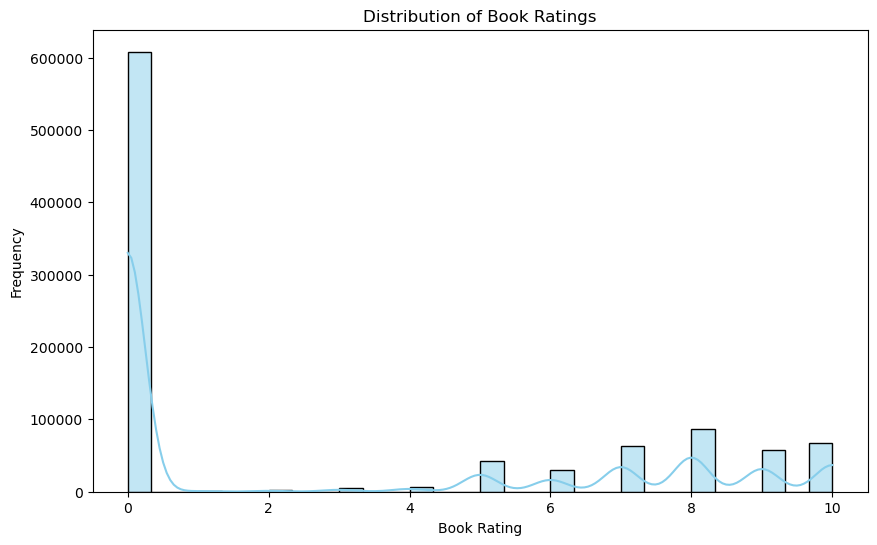

Top 10 Most Common Ratings:
0     608269
8      86828
10     67801
7      62746
9      57721
5      42990
6      29901
4       7103
3       4825
2       2207
Name: Rating, dtype: int64


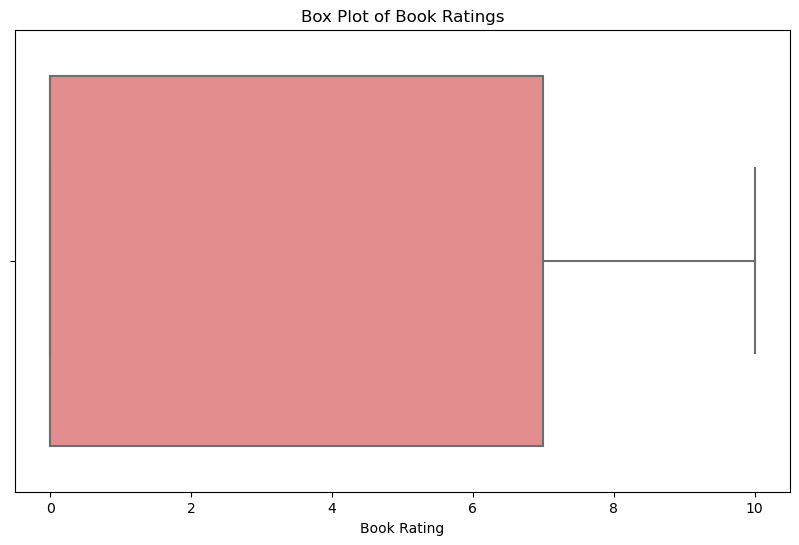

In [25]:
# the 'Book_Rating' column
ratings = df['Rating']

# Step 1: Visualize the distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

# Step 2: Identify the most common ratings and their frequency
most_common_ratings = ratings.value_counts().head(10)
print("Top 10 Most Common Ratings:")
print(most_common_ratings)

# Step 3: Check for outliers or unusual patterns using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=ratings, color='lightcoral')
plt.title('Box Plot of Book Ratings')
plt.xlabel('Book Rating')
plt.show()


1. **Distribution Visualization:**
   - The histogram shows the distribution of book ratings.
   - The majority of ratings seem to be centered around 0, with a long tail towards higher ratings.
   - There is a peak at 0, indicating a substantial number of zero ratings, possibly indicating a default or undefined value.

2. **Top 10 Most Common Ratings:**
   - The ten most common ratings and their frequencies are displayed.
   - The most frequent rating is 0, which occurs significantly more often than other ratings.
   - Ratings 8, 10, 7, and 9 also have notable frequencies.

3. **Box Plot:**
   - The box plot reveals the central tendency and spread of ratings.
   - The median rating appears to be around 0.
   - The box plot suggests a concentration of ratings towards the lower end, with a long tail extending towards higher ratings.
   - The presence of a large number of zero ratings is confirmed.


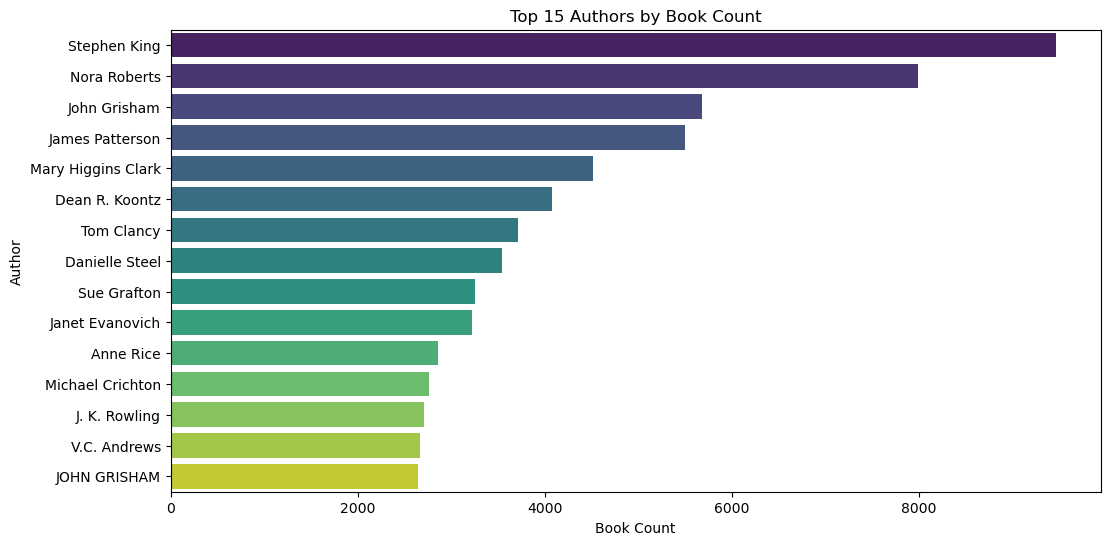

In [26]:
# Distribution of author column named 'Book_Author'
authors_counts = df['Book-Author'].value_counts().head(15)

# Plot the distribution of books across authors
plt.figure(figsize=(12, 6))
sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')
plt.title('Top 15 Authors by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Author')
plt.show()


In [27]:
popular_authors = df['Book-Author'].value_counts().head(15)
print("Top 15 Popular Authors:")
print(popular_authors)

Top 15 Popular Authors:
Stephen King          9467
Nora Roberts          7992
John Grisham          5683
James Patterson       5497
Mary Higgins Clark    4519
Dean R. Koontz        4078
Tom Clancy            3719
Danielle Steel        3544
Sue Grafton           3259
Janet Evanovich       3217
Anne Rice             2860
Michael Crichton      2760
J. K. Rowling         2709
V.C. Andrews          2671
JOHN GRISHAM          2647
Name: Book-Author, dtype: int64


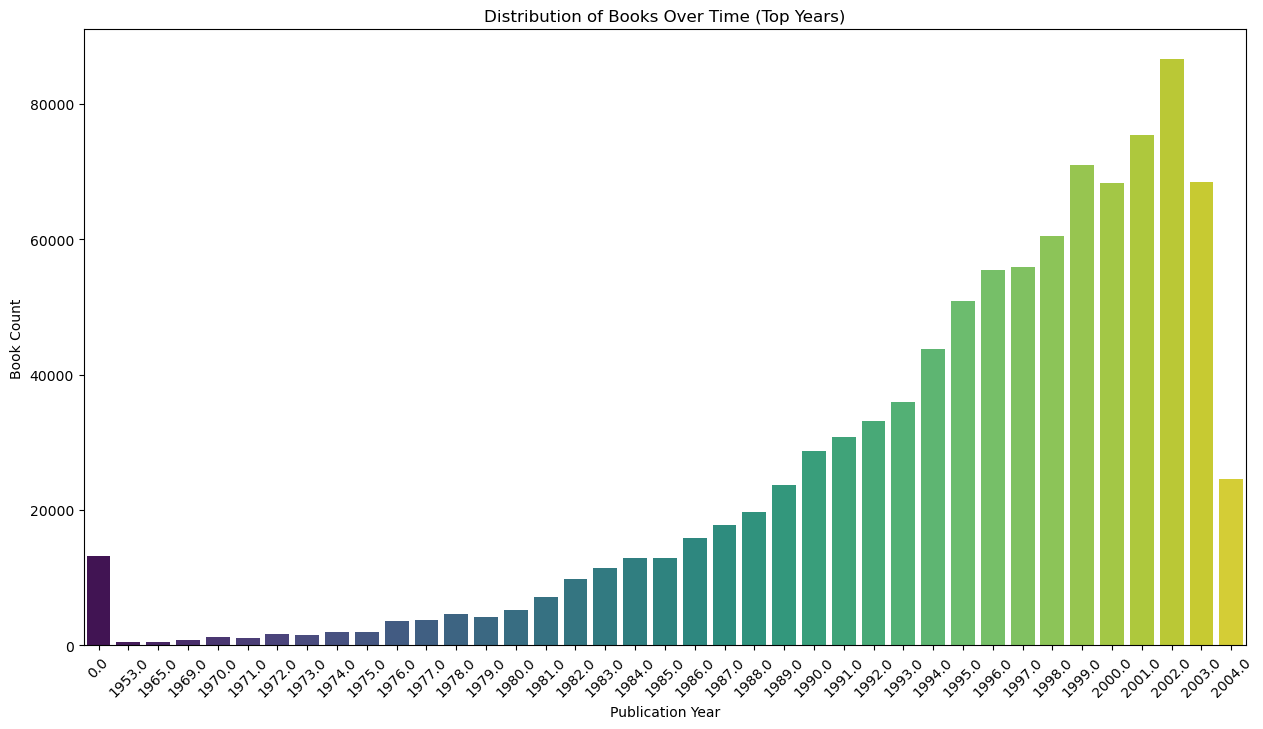

In [28]:
# Examine the Distribution of Books Over Time:

# Extract year from the publication date
publication_year = df['Year-Of-Publication']

# Count the occurrences of each publication year
year_counts = publication_year.value_counts()

# Filter out less frequent years (e.g., only show years with more than 500 books)
filtered_years = year_counts[year_counts > 500].index

# Plot the distribution of books over time for the selected years
plt.figure(figsize=(15, 8))
sns.countplot(x=publication_year[publication_year.isin(filtered_years)], palette='viridis')
plt.title('Distribution of Books Over Time (Top Years)')
plt.xlabel('Publication Year')
plt.ylabel('Book Count')
plt.xticks(rotation=45)
plt.show()


The graph shows the top publication years with the highest counts of books.
There's a year '0.0' with 13,207 books. This might indicate a case where the year of publication is not available or specified, and it has been assigned the value '0.0'

In [29]:
df.columns

Index(['User-ID', 'ISBN', 'Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [30]:
# Now, you can find the nlargest based on numeric ratings
top_rated_books = df.nlargest(10, 'Rating')
print("Top-rated books:")
print(top_rated_books[['Book-Title', 'Rating']])



Top-rated books:
                                            Book-Title  Rating
20   Flu: The Story of the Great Influenza Pandemic...      10
36                              The Kitchen God's Wife      10
41                              The Kitchen God's Wife      10
55                              The Kitchen God's Wife      10
84   A Second Chicken Soup for the Woman's Soul (Ch...      10
110                                      The Testament      10
111                                      The Testament      10
136                                      The Testament      10
137                                      The Testament      10
159                                      The Testament      10


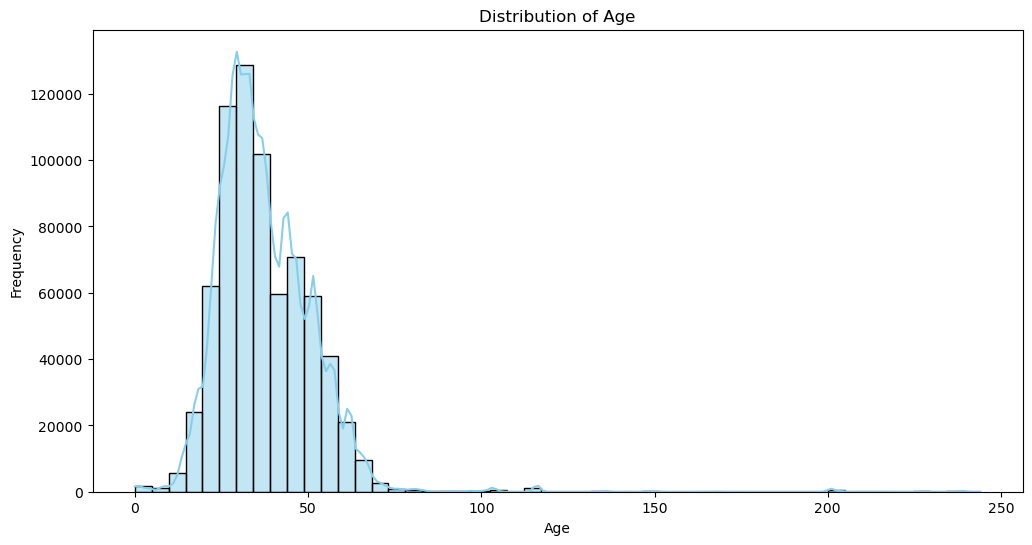

In [31]:
# Drop NaN values in the 'Age' column for plotting
age_data = df_books['Age'].dropna()

# Plot the distribution of age using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(age_data, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Here we can see the distribution of readers age

In [32]:
df.columns

Index(['User-ID', 'ISBN', 'Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

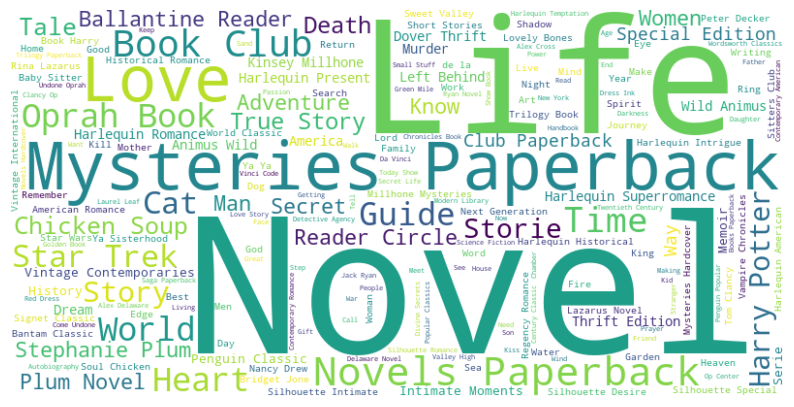

In [33]:
from wordcloud import WordCloud
# Combine relevant text data (e.g., book titles or authors)
text_data = ' '.join(df['Book-Title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud suggests most book names revolve around words like life, love, andothers as seen

### 4. Feature Selection

In [34]:

def filter_active_users(dataframe, threshold):

    """Filter the dataframe to include only users who have actively rated more than the threshold"""
    # Filter the DataFrame based on the count of each unique User-ID
    user_counts = dataframe['User-ID'].value_counts()
    filter = user_counts > threshold

    # Get the index values of the filtered rows
    filtered_index = filter[filter].index

    # Create a new DataFrame by selecting only the rows where User-ID is in the filtered index
    filtered_df = dataframe[dataframe['User-ID'].isin(filtered_index)]

    return filtered_df

df_filtered = filter_active_users(df, 100)
df_filtered

,User-ID,ISBN,Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
3,11676,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
6,85526,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
7,96054,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
10,177458,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
13,219008,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
...,...,...,...,...,...,...,...,...,...,...
971734,261829,0891418253,0,The Black Sheep,BRUCE GAMBLE,2003.0,Presidio Press,http://images.amazon.com/images/P/0891418253.0...,http://images.amazon.com/images/P/0891418253.0...,http://images.amazon.com/images/P/0891418253.0...
971735,261829,089141827X,0,The Rise and Fall of an American Army,SHELBY L. STANTON,2003.0,Presidio Press,http://images.amazon.com/images/P/089141827X.0...,http://images.amazon.com/images/P/089141827X.0...,http://images.amazon.com/images/P/089141827X.0...
971736,261829,096425218X,0,Take China: The Last of the China Marines,Harold Stephens,2002.0,Wolfenden,http://images.amazon.com/images/P/096425218X.0...,http://images.amazon.com/images/P/096425218X.0...,http://images.amazon.com/images/P/096425218X.0...
971737,261829,1557731675,0,Buddy Boys,Mike McAlary,1989.0,Jove Books,http://images.amazon.com/images/P/1557731675.0...,http://images.amazon.com/images/P/1557731675.0...,http://images.amazon.com/images/P/1557731675.0...


In [35]:
def filter_popular_books(dataframe, threshold):
    """Filter the dataframe to include only books that have been rated more than the threshold"""
    
    # Count the occurrences of each unique ISBN
    book_counts = dataframe['ISBN'].value_counts()
    
    # Create a boolean mask for filtering based on the threshold
    mask = book_counts > threshold

    # Get the index values of the filtered rows
    filtered_index = mask[mask].index

    # Create a new DataFrame by selecting only the rows where ISBN is in the filtered index
    filtered_df = dataframe[dataframe['ISBN'].isin(filtered_index)]

    return filtered_df


In [36]:
# Example usage: Keep books that have been rated more than 100 times
df_filtered_books = filter_popular_books(df_filtered, 50)
df_filtered_books


,User-ID,ISBN,Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
98,2977,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
100,3363,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
103,7346,0440234743,9,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
106,9747,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
107,9856,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
...,...,...,...,...,...,...,...,...,...,...
467820,244688,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...
467821,245827,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...
467823,251422,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...
467824,252071,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...


In [37]:
# Check for duplicate entries in the 'User-ID' and 'Book-Title' columns
duplicates = df_filtered_books.duplicated(subset=['User-ID', 'Book-Title'], keep=False)

# Display the duplicate entries
duplicate_entries = df_filtered_books[duplicates]
print("Duplicate Entries:")
print(duplicate_entries)

# Calculate the percentage of duplicates in the dataset
duplicate_percentage = (len(duplicate_entries) / len(df_filtered_books)) * 100
print(f"Duplicated rows constitute {duplicate_percentage:.2f}% of our dataset")

# Remove duplicate entries and create the final dataframe
final_df = df_filtered_books.drop_duplicates(subset=['User-ID', 'Book-Title'])

# Display the first few rows of the resulting dataframe
print("Final DataFrame after removing duplicates:")
final_df.head()


Duplicate Entries:
       User-ID        ISBN  Rating                 Book-Title  \
109      11676  0440234743       9              The Testament   
137      31315  0440234743      10              The Testament   
149      39646  0440234743       0              The Testament   
187      69232  0440234743       0              The Testament   
264     115120  0440234743       0              The Testament   
...        ...         ...     ...                        ...   
417554  144531  0451197747       0  The Deep End of the Ocean   
417559  159033  0451197747       0  The Deep End of the Ocean   
417579  190459  0451197747       5  The Deep End of the Ocean   
417581  198711  0451197747       0  The Deep End of the Ocean   
417592  224138  0451197747      10  The Deep End of the Ocean   

               Book-Author  Year-Of-Publication    Publisher  \
109           John Grisham               1999.0         Dell   
137           John Grisham               1999.0         Dell   
149     

,User-ID,ISBN,Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
98,2977,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
100,3363,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
103,7346,0440234743,9,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
106,9747,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
107,9856,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...


In [38]:
final_df

,User-ID,ISBN,Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
98,2977,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
100,3363,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
103,7346,0440234743,9,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
106,9747,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
107,9856,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
...,...,...,...,...,...,...,...,...,...,...
467820,244688,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...
467821,245827,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...
467823,251422,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...
467824,252071,0312971125,0,Crazy for You,Jennifer Crusie,2000.0,St. Martin's Press,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...,http://images.amazon.com/images/P/0312971125.0...


## 5. Modelling


### 1. Memory Based Collaborative Filtering

>> With memory/neighborhood-based collaborative filtering methods, we are attempting to quantify just how similar users and items are to one another and getting the top N recommendations based on that similarity metric. 

In [39]:
# Using 'Book_Title', 'Book_Rating', 'User_id' Create a user-item matrix
book_pivot = final_df.pivot_table(index='Book-Title', columns='User-ID', values='Rating', fill_value=0)

#creating a sparse matrix to fit into our model
book_sparse = csr_matrix(book_pivot)
book_pivot

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,259829,259901,259930,260183,260897,260944,261037,261105,261603,261829
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1st to Die: A Novel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2nd Chance,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,7
4 Blondes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
You Belong To Me,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <span style= 'color:Blue'> 1.1 Nearest Neighbors using Cosine Similarity </span>
>> I will implement the brute force algorithm in the Nearest Neighbors class.
>> I will be using cosine similariry which determines how vectors are related to each other.

In [40]:
# instantiating Nearest Neighbors 
nearest_neighbor_model = NearestNeighbors(metric='cosine', algorithm='brute')

#fitting the model to the sparse matrix
model = nearest_neighbor_model.fit(book_sparse)

In [41]:
def recommend_book(book_name):
    """Define a function to recommend books based on a given book name."""
    
    # Check if the input book name is in the book_pivot index
    if book_name in book_pivot.index:
        
        # Find the index of the input book name in the book_pivot index array
        book_id = np.where(book_pivot.index == book_name)[0][0]
        
        # Compute the distances and suggestions using the nearest_neighbor_model
        distances, suggestions = nearest_neighbor_model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)
        
        # Iterate over each suggestion
        for i in range(len(suggestions)):
            
            # Retrieve the book names from the book_pivot index based on the suggestions
            books = set(book_pivot.index[suggestions[i]])
            
            # Remove the input book itself from the set
            books.discard(book_name)
            
            # Print the recommended book names
            print(f"Books similar to '{book_name}':")
            for j in books:
                print(j)
    else:
        print(f"Book '{book_name}' not found in the dataset.")

# Specify the book name for which recommendations will be made
book_name = 'The Coming Wave'

# Call the recommend_book function with the specified book name
recommend_book(book_name)


Book 'The Coming Wave' not found in the dataset.


In [42]:
recommend_book('Year of Wonders')

Books similar to 'Year of Wonders':
Bridget Jones: The Edge of Reason
Drowning Ruth (Oprah's Book Club)
Balzac and the Little Chinese Seamstress : A Novel
Atonement : A Novel
Where or When  : A Novel


### <span style= 'color:blue'> 1.2 KNNwithMeans </span>
>> This algorithm leverages neighborhood information, handles user or item biases through rating adjustment, and aims to provide accurate predictions for rating prediction tasks in collaborative filtering.

>> We wil be using pearson similarity matrix

In [43]:
# Import necessary libraries
from surprise import KNNWithMeans
from surprise import accuracy

# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 10))  # Adjust the rating scale based on your dataset

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(final_df[['Book-Title', 'User-ID', 'Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Specify similarity metrics and user-based approach for KNNWithMeans
sim_options = {'name': 'pearson', 'user_based': True}

# Instantiate KNNWithMeans with the specified similarity options
knn_means = KNNWithMeans(sim_options=sim_options)

# Train the KNNWithMeans model on the training set
knn_means.fit(trainset)

# Make predictions on the test set
predictions = knn_means.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.3847
RMSE: 3.3846968919624305


The model has successfully computed the Pearson similarity matrix. This matrix represents the similarity between different users or items based on their ratings.

**Interpretation of RMSE:**
Provide some context for the RMSE value. A lower RMSE generally indicates better model performance. However, the interpretation depends on the scale of your ratings.
The RMSE value obtained is approximately 3.3847, which suggests that the model's predictions deviate from the actual ratings by an average of around 3.3847 units on the rating scale. Lower RMSE values generally indicate better predictive performance. 

### 2. Model Based Collaborative Filtering Recommender 

>> Model based collaborative filtering approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in a lower-dimensional space.
The goal of this section is to compare SVD and SVDpp algorithms, try optimizing parameters and explore obtained results.Let's start by preparing our dataset for modelling

Filtering the data to ensure its quality before applying model-based collaborative filtering is crucial for obtaining meaningful and accurate recommendations. 

In [44]:
# Remove outliers based on ratings
q_low = final_df['Rating'].quantile(0.01)
q_high = final_df['Rating'].quantile(0.99)
final_df = final_df[(final_df['Rating'] >= q_low) & (final_df['Rating'] <= q_high)]


In [45]:
# Set the threshold for the minimum number of ratings per user
user_ratings_threshold = 3

# Count the number of ratings for each user in final_df
filter_users = final_df['User-ID'].value_counts()

# Filter out users who have at least user_ratings_threshold ratings
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

# Create a new DataFrame, df_ratings_top, by keeping only the records from final_df
# where the user_id is present in the filter_users_list
df_ratings_top = final_df[final_df['User-ID'].isin(filter_users_list)]

# Print the information about the filtering
print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))


Filter: users with at least 3 ratings
Number of records: 60632


In [46]:
# Set the threshold percentage for the most frequently rated books
book_ratings_threshold_perc = 0.1

# Calculate the threshold value based on the unique number of books in df_ratings_top
book_ratings_threshold = len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc

# Filter out books that are among the most frequently rated
filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()

# Create a new DataFrame, df_ratings_top, by keeping only the records from df_ratings_top
# where the isbn is present in the filter_books_list
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

# Print the information about the filtering
print('Filter: Top %d%% Most Frequently Rated Books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))


Filter: Top 10% Most Frequently Rated Books
Number of records: 13248


These codes are used to filter the dataset to include only users with a minimum number of ratings and books that are among the most frequently rated, based on specified thresholds.







### 1. SVD (Singular Value Decomposition) 

>> Fitting Singular Value Decomposition (SVD) for recommendation involves using matrix factorization to decompose the user-item interaction matrix into three matrices: user matrix, item matrix, and singular values.
>> SVD is a widely used matrix decomposition method that works by reducing dimensionality of the user item matrix by extracting its latent factors and capturing underlying patterns.

In [47]:
# Import necessary libraries
from surprise import SVD
from surprise import accuracy


# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 10))  # Adjust the rating scale based on your dataset

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df_ratings_top[['Book-Title', 'User-ID', 'Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Instantiate the SVD model
svd_model = SVD()

# Train the SVD model on the training set
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 3.6222
RMSE: 3.6222143428774136


### Optimizing SVD Model

In [48]:
# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 10)) 

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df_ratings_top[['Book-Title', 'User-ID', 'Rating']], reader)

# Define the parameter grid
param_grid = {'n_factors': [10, 100, 500],
              'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}

# Instantiate the SVD model
svd = SVD()

# Instantiate GridSearchCV with the SVD model and parameter grid
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Perform grid search
grid_search.fit(data)

# Print the best RMSE score and the corresponding parameters
print(f"Best RMSE Score: {grid_search.best_score['rmse']}")
print(f"Best Parameters: {grid_search.best_params['rmse']}")


Best RMSE Score: 3.533294473449755
Best Parameters: {'n_factors': 10, 'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.2}


Great! I have reduced RMSE, which is an indication of improved performance.

In [49]:
from surprise.model_selection import RandomizedSearchCV

param_dist = {'n_factors': [5, 10, 15],
              'n_epochs': [10, 15, 20],
              'lr_all': [0.004, 0.005, 0.006],
              'reg_all': [0.1, 0.2, 0.3]}

random_search = RandomizedSearchCV(SVD, param_distributions=param_dist, measures=['rmse'], n_iter=10, cv=3)
random_search.fit(data)

print(f"Best RMSE Score: {random_search.best_score['rmse']}")
print(f"Best Parameters: {random_search.best_params['rmse']}")

Best RMSE Score: 3.5171724914808666
Best Parameters: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.3}


In [50]:
# Instantiate the SVD model with the best parameters
best_svd_model = SVD(n_factors=10, n_epochs=15, lr_all=0.005, reg_all=0.2)

# Train the SVD model on the full training set
best_svd_model.fit(trainset)

# Make predictions on the test set
predictions = best_svd_model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"New RMSE: {rmse}")


RMSE: 3.4894
New RMSE: 3.489437961113785


### 1.SVDpp 
>> The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

In [51]:
# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 10))  

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df_ratings_top[['Book-Title', 'User-ID', 'Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Instantiate the SVD++ model
svdpp_model = SVDpp()

# Train the SVD++ model on the training set
svdpp_model.fit(trainset)

# Make predictions on the test set
predictions = svdpp_model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 3.8204
RMSE: 3.8204472427973077


The test_RMSE for SVD is much more better thus I will go with the optimized svd model 

### Summary:

1. **Memory-Based Collaborative Filtering:**
    - Utilizes neighborhood-based methods to quantify user-item similarity.
    - Constructs a user-item matrix using 'Book_Title', 'Book_Rating', and 'User_id'.
    - Implements nearest neighbor recommendation using cosine similarity.
    - Applies KNNWithMeans algorithm leveraging Pearson similarity for recommendation.

2. **Model-Based Collaborative Filtering:**
    - Prepares dataset by removing outliers based on ratings.
    - Filters dataset to include users with a minimum number of ratings and books among the most frequently rated.
    - Applies SVD algorithm for recommendation by factorizing the user-item interaction matrix.
    - Optimizes SVD model parameters using GridSearchCV and RandomizedSearchCV to reduce RMSE.
    - Implements SVD++ algorithm, an extension of SVD considering implicit ratings, but observes higher RMSE compared to the optimized SVD model.

3. **Result:**
    - The optimized SVD model exhibits the lowest RMSE among the models tested, indicating better predictive performance.
    - Hence, the optimized SVD model is chosen for recommendation purposes.

### Conclusion:

1. **Distribution of Ratings:**
    - The histogram and box plot reveal a significant number of zero ratings, possibly indicating a default or undefined value.
    - Most common ratings include 0, 8, 10, 7, and 9, with 0 occurring significantly more often than others.

2. **Author Analysis:**
    - Stephen King, Nora Roberts, and John Grisham are among the top authors with the highest counts of books.
    - This indicates these authors' popularity and possibly their influence on the dataset.

3. **Temporal Analysis:**
    - The distribution of books over time shows peaks in certain years, but there's a notable occurrence of year '0.0', suggesting missing or unspecified publication years for some books.

4. **Top-N Analysis:**
    - Top-rated books predominantly have a rating of 10, suggesting a favorable reception among readers.

5. **Word Clouds:**
    - Word clouds for book titles indicate common themes such as life, love, and others, reflecting popular topics in the dataset.

### Recommendations:

1. **Data Quality Improvement:**
    - Address missing or unspecified values, especially in the publication year column, to enhance temporal analysis accuracy.

2. **Outlier Handling:**
    - Further investigate zero ratings to determine if they represent genuine feedback or if there's a data issue causing their prevalence.
    - Consider handling outliers, such as extremely high ratings, to ensure they do not skew analysis results.

3. **Content-Based Analysis:**
    - Explore additional features like book genres or summaries to perform content-based analysis and recommendation.

4. **Collaborative Filtering Refinement:**
    - Refine collaborative filtering models, such as SVD, by optimizing parameters to improve recommendation accuracy.
    - Consider incorporating implicit ratings or preferences to enhance recommendation relevance.

### Next Steps:

1. **Data Preprocessing:**
    - Cleanse and preprocess the dataset, addressing missing values, outliers, and data inconsistencies.

2. **Feature Engineering:**
    - Engineer new features or extract additional information from existing ones to enrich the dataset for modeling.

3. **Model Development:**
    - Develop and train recommendation models, including collaborative filtering, content-based filtering, or hybrid approaches.

4. **Evaluation and Validation:**
    - Evaluate model performance using appropriate metrics and validation techniques to ensure reliability and effectiveness.

5. **Deployment and Monitoring:**
    - Deploy the recommendation system in a production environment and continuously monitor its performance and user feedback for further refinement.

6. **User Feedback Incorporation:**
    - Gather user feedback and iteratively improve the recommendation system based on user preferences and behavior.

By following these steps, the book recommendation project can deliver more accurate and personalized recommendations, enhancing user satisfaction and engagement.

## Deployment.

In [52]:
# Getting the indexes of the book names to be used in app.py app
book_names = book_pivot.index
book_names

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action',
       ...
       'Wild Animus', 'Winter Moon', 'Wish You Well', 'Without Remorse',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=677)

In [53]:
#final_df = df_ratings_top
#final_df

In [54]:
# importing necessary lib

from joblib import dump, load

# Pickling necessary dependancies

dump(book_pivot, 'book_pivot.pkl')
dump(best_svd_model,'model.pkl')
dump(final_df, 'final_df.pkl')
dump(book_names, 'book_names.pkl')

['book_names.pkl']

In [55]:
from joblib import load

with open('model.pkl', 'rb') as f:
    model = load(f)

In [56]:
book_pivot


User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,259829,259901,259930,260183,260897,260944,261037,261105,261603,261829
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1st to Die: A Novel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2nd Chance,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,7
4 Blondes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
You Belong To Me,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
def recommend_book(book_name, model, book_pivot):
    """Define a function to recommend books based on a given book name."""
    
    # Check if the input book name is in the book_pivot index
    if book_name in book_pivot.index:
        
        # Find the index of the input book name in the book_pivot index array
        book_id = book_pivot.index.get_loc(book_name)
        
        # Predict ratings for all users for the internal book ID
        predicted_ratings = [model.predict(str(user_id), str(book_id)).est for user_id in range(1, len(book_pivot) + 1)]
        
        # Find indices of top 5 books with the highest predicted ratings
        top_indices = np.argsort(predicted_ratings)[::-1][:6]
        
        # Extract recommended book names
        recommended_books = [book_pivot.index[idx] for idx in top_indices]
        
        # Print the recommended book names
        print(f"Books similar to '{book_name}':")
        for book in recommended_books:
            if book != book_name:  # Exclude the input book itself
                print(book)
    else:
        print(f"Book '{book_name}' not found in the dataset.")

# Specify the book name for which recommendations will be made
book_name = '1st to Die: A Novel'

# Call the recommend_book function with the specified book name
recommend_book(book_name, best_svd_model, book_pivot)



Books similar to '1st to Die: A Novel':
\O\" Is for Outlaw"
Heart of the Sea (Irish Trilogy)
Holes (Yearling Newbery)
High Five (A Stephanie Plum Novel)
Hideaway
Hide &amp; Seek
